In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
# importing the dataset
df=pd.read_csv('basket_analysis_associationrule.csv')
df.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    999 non-null    int64
 1   Apple         999 non-null    bool 
 2   Bread         999 non-null    bool 
 3   Butter        999 non-null    bool 
 4   Cheese        999 non-null    bool 
 5   Corn          999 non-null    bool 
 6   Dill          999 non-null    bool 
 7   Eggs          999 non-null    bool 
 8   Ice cream     999 non-null    bool 
 9   Kidney Beans  999 non-null    bool 
 10  Milk          999 non-null    bool 
 11  Nutmeg        999 non-null    bool 
 12  Onion         999 non-null    bool 
 13  Sugar         999 non-null    bool 
 14  Unicorn       999 non-null    bool 
 15  Yogurt        999 non-null    bool 
 16  chocolate     999 non-null    bool 
dtypes: bool(16), int64(1)
memory usage: 23.5 KB


In [5]:
df.describe()

,Unnamed: 0
count,999.000000
mean,499.000000
std,288.530761
min,0.000000
25%,249.500000
50%,499.000000
75%,748.500000
max,998.000000


In [10]:
# Initialize variables to keep track of the maximum count and the corresponding column
max_true_count = 0
max_true_column = None

# Iterate through the columns, excluding the first one
for col in df.iloc[:, 1:].columns:
    # Get the count of True values in the current column
    true_count = df[col].value_counts().get(True, 0)

    # Print the value counts (optional)
    print(col, ":", df[col].value_counts())

    # Update the maximum count and column if the current count is higher
    if true_count > max_true_count:
        max_true_count = true_count
        max_true_column = col

# Print the column with the maximum count of True values
print(f"Column with the maximum count of True values: {max_true_column} ({max_true_count} True values)")


Apple : Apple
False    616
True     383
Name: count, dtype: int64
Bread : Bread
False    615
True     384
Name: count, dtype: int64
Butter : Butter
False    579
True     420
Name: count, dtype: int64
Cheese : Cheese
False    595
True     404
Name: count, dtype: int64
Corn : Corn
False    592
True     407
Name: count, dtype: int64
Dill : Dill
False    601
True     398
Name: count, dtype: int64
Eggs : Eggs
False    615
True     384
Name: count, dtype: int64
Ice cream : Ice cream
False    589
True     410
Name: count, dtype: int64
Kidney Beans : Kidney Beans
False    591
True     408
Name: count, dtype: int64
Milk : Milk
False    594
True     405
Name: count, dtype: int64
Nutmeg : Nutmeg
False    598
True     401
Name: count, dtype: int64
Onion : Onion
False    596
True     403
Name: count, dtype: int64
Sugar : Sugar
False    590
True     409
Name: count, dtype: int64
Unicorn : Unicorn
False    610
True     389
Name: count, dtype: int64
Yogurt : Yogurt
False    579
True     420
Name: coun

In [ ]:
# Chocolate is the most frequent item and there are 16 unique items in the data set

In [12]:
df.isnull().sum()

Unnamed: 0      0
Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64

In [ ]:
# No null values found

In [13]:
df.duplicated().sum()

0

In [10]:
# No duplicate values found

0

# Apriori Algorithm to check frequent datasets


In [14]:
frequent_itemsets = apriori(df.iloc[:,1:], min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values('support', ascending = False)


,support,itemsets
15,0.421421,(chocolate)
2,0.420420,(Butter)
14,0.420420,(Yogurt)
7,0.410410,(Ice cream)
12,0.409409,(Sugar)
...,...,...
136,0.100100,"(Butter, Sugar, Apple)"
155,0.100100,"(Cheese, Nutmeg, Onion)"
149,0.100100,"(Butter, Nutmeg, Yogurt)"
166,0.100100,"(Milk, Kidney Beans, Nutmeg)"


In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules.sort_values(['lift','conviction'], ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
324,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
329,(Onion),"(Cheese, Dill)",0.403403,0.177177,0.102102,0.253102,1.428523,0.030628,1.101653,0.502813
404,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
405,(chocolate),"(Dill, Unicorn)",0.421421,0.168168,0.101101,0.239905,1.426578,0.030231,1.094379,0.516821
395,(chocolate),"(Milk, Dill)",0.421421,0.190190,0.114114,0.270784,1.423753,0.033964,1.110521,0.514418
...,...,...,...,...,...,...,...,...,...,...
188,(Kidney Beans),(Onion),0.408408,0.403403,0.170170,0.416667,1.032878,0.005417,1.022737,0.053807
130,(Eggs),(Dill),0.384384,0.398398,0.157157,0.408854,1.026245,0.004019,1.017687,0.041541
131,(Dill),(Eggs),0.398398,0.384384,0.157157,0.394472,1.026245,0.004019,1.016660,0.042509
151,(Ice cream),(Eggs),0.410410,0.384384,0.157157,0.382927,0.996208,-0.000598,0.997638,-0.006415


In [18]:
# Getting top 20 associations based on lift values
rules.sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
329,(Onion),"(Cheese, Dill)",0.403403,0.177177,0.102102,0.253102,1.428523,0.030628,1.101653,0.502813
324,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
404,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
405,(chocolate),"(Dill, Unicorn)",0.421421,0.168168,0.101101,0.239905,1.426578,0.030231,1.094379,0.516821
395,(chocolate),"(Milk, Dill)",0.421421,0.190190,0.114114,0.270784,1.423753,0.033964,1.110521,0.514418
390,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
393,(Milk),"(chocolate, Dill)",0.405405,0.199199,0.114114,0.281481,1.413065,0.033358,1.114517,0.491627
392,"(chocolate, Dill)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
328,(Dill),"(Cheese, Onion)",0.398398,0.185185,0.102102,0.256281,1.383920,0.028325,1.095596,0.461127
325,"(Cheese, Onion)",(Dill),0.185185,0.398398,0.102102,0.551351,1.383920,0.028325,1.340919,0.340463


In [31]:
rules[rules.lift>1.2].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
329,(Onion),"(Cheese, Dill)",0.403403,0.177177,0.102102,0.253102,1.428523,0.030628,1.101653,0.502813
324,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
404,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
405,(chocolate),"(Dill, Unicorn)",0.421421,0.168168,0.101101,0.239905,1.426578,0.030231,1.094379,0.516821
395,(chocolate),"(Milk, Dill)",0.421421,0.190190,0.114114,0.270784,1.423753,0.033964,1.110521,0.514418
...,...,...,...,...,...,...,...,...,...,...
185,(Kidney Beans),(Milk),0.408408,0.405405,0.199199,0.487745,1.203105,0.033628,1.160740,0.285361
323,(Yogurt),"(Butter, Nutmeg)",0.420420,0.198198,0.100100,0.238095,1.201299,0.016774,1.052365,0.289119
318,"(Butter, Nutmeg)",(Yogurt),0.198198,0.420420,0.100100,0.505051,1.201299,0.016774,1.170987,0.208989
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,0.283728


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

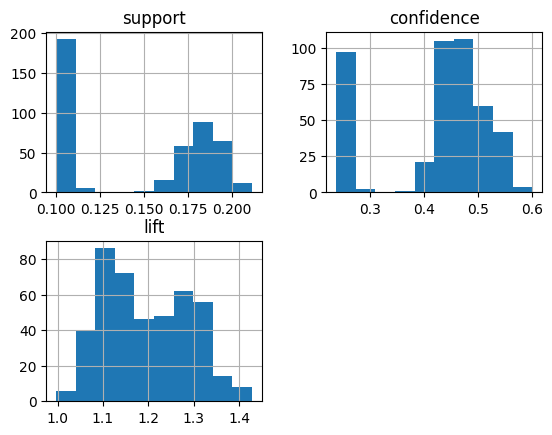

In [21]:
rules[['support','confidence','lift']].hist()

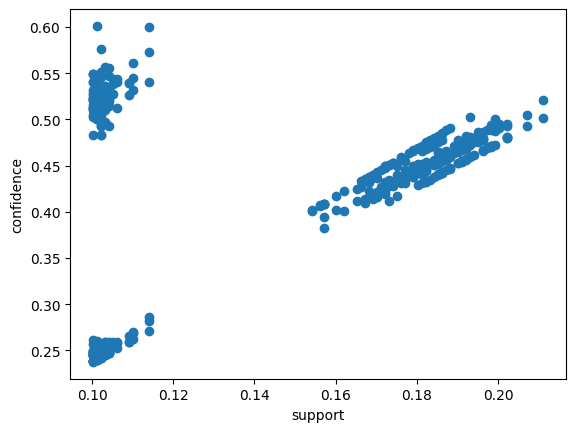

In [23]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

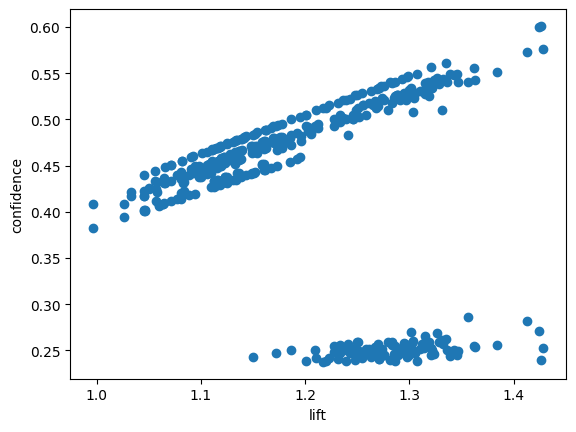

In [24]:
plt.scatter(rules['lift'], rules['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence')
plt.show()

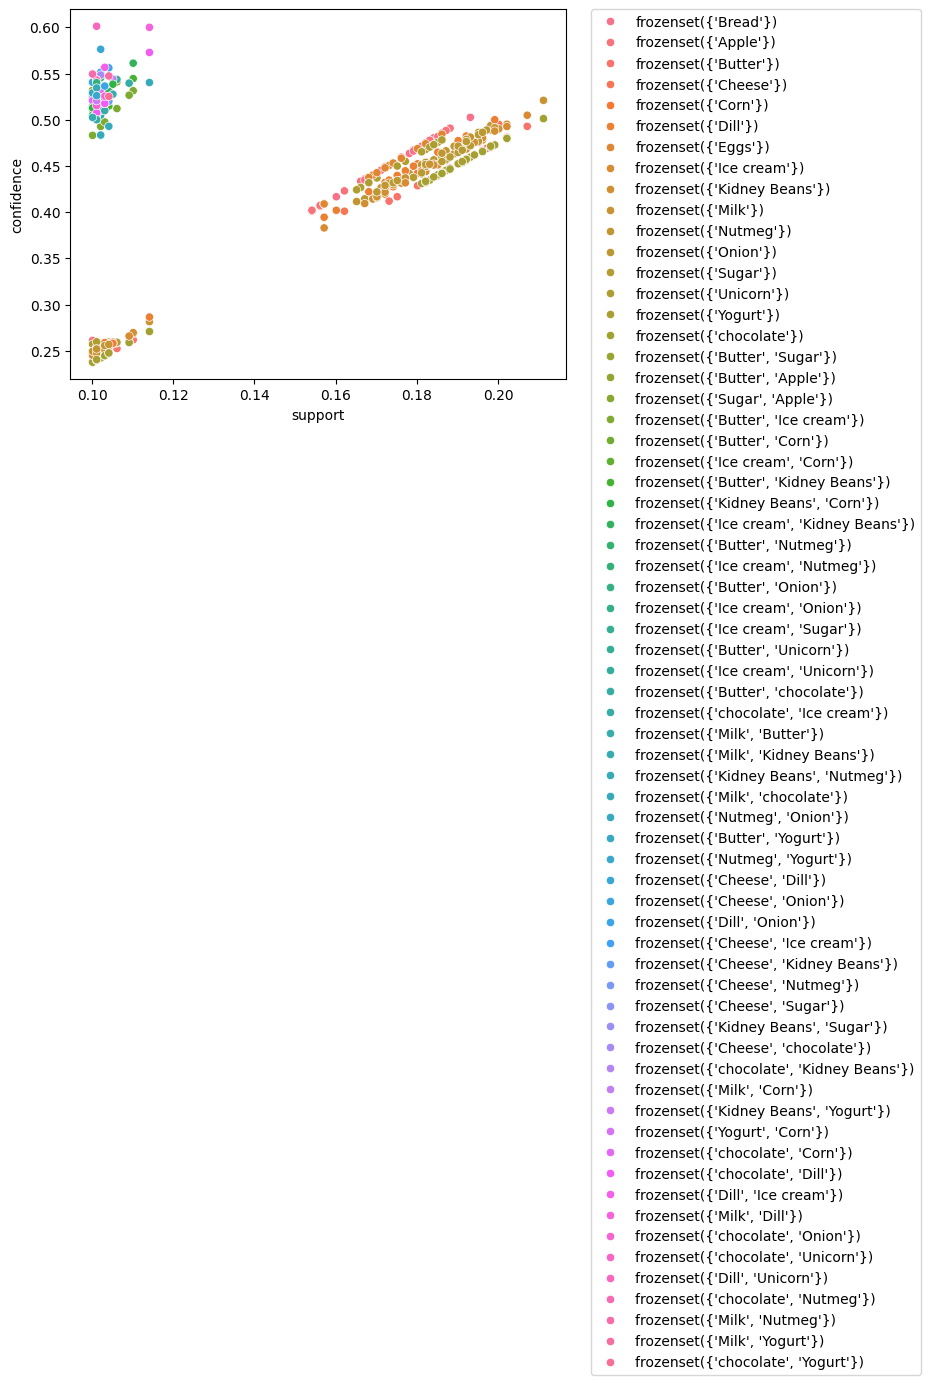

In [29]:
import seaborn as sns
sns.scatterplot(x='support', y='confidence', data=rules, hue='antecedents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [30]:
# Getting top 20 associations based on confidence values
rules.sort_values('confidence', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
404,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
390,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
324,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
392,"(chocolate, Dill)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
260,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125
386,"(Dill, Ice cream)",(chocolate),0.185185,0.421421,0.103103,0.556757,1.321140,0.025062,1.305330,0.298323
330,"(Cheese, Ice cream)",(Kidney Beans),0.187187,0.408408,0.104104,0.556150,1.361749,0.027655,1.332863,0.326828
325,"(Cheese, Onion)",(Dill),0.185185,0.398398,0.102102,0.551351,1.383920,0.028325,1.340919,0.340463
283,"(Butter, Unicorn)",(Ice cream),0.182182,0.410410,0.100100,0.549451,1.338783,0.025331,1.308601,0.309425
421,"(Milk, Nutmeg)",(Kidney Beans),0.182182,0.408408,0.100100,0.549451,1.345346,0.025695,1.313045,0.313880


In [ ]:
# The strongest association is (Onion)	(Cheese, Dill)

In [ ]:
# There is strogest confidence that (chocolate)	can be purchased if (Dill, Unicorn) is purchased